Importando a base de dados novamente:

In [1]:
import pandas as pd

url_dados = "alura/dados/dados_experimentos.zip"

dados = pd.read_csv(url_dados, compression="zip")
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Renomeando a coluna `droga` para `composto`:

In [2]:
dados.rename(
    columns={"droga": "composto"},
    inplace=True
)

dados.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'composto', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

Criando uma tabela de frequências das doses em relação ao tempo:

In [3]:
pd.crosstab(dados['dose'], dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


Criando uma tabela de frequências das doses e do tempo em relação ao tratamento:

In [4]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Normalizando a tabela de frequências anterior:

In [5]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='index').multiply(100).round(2).astype(
    str) + '%'

tratamento com_controle com_droga
dose tempo                       
D1   24           7.75%    92.25%
     48           7.88%    92.12%
     72           7.86%    92.14%
D2   24           7.85%    92.15%
     48           7.83%    92.17%
     72           7.85%    92.15%

Mostrando a média da mesma tabela utilizada anteriormente:

In [6]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

**Desafio**: utilizar outra medida de resumo na tabela.

In [7]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='std')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.751395   1.461954
     48         0.853396   1.693903
     72         0.769294   1.458600
D2   24         0.836626   1.044999
     48         0.836845   1.315476
     72         0.878041   1.451532

Plotando a dispersão das colunas g-0 e g-3:

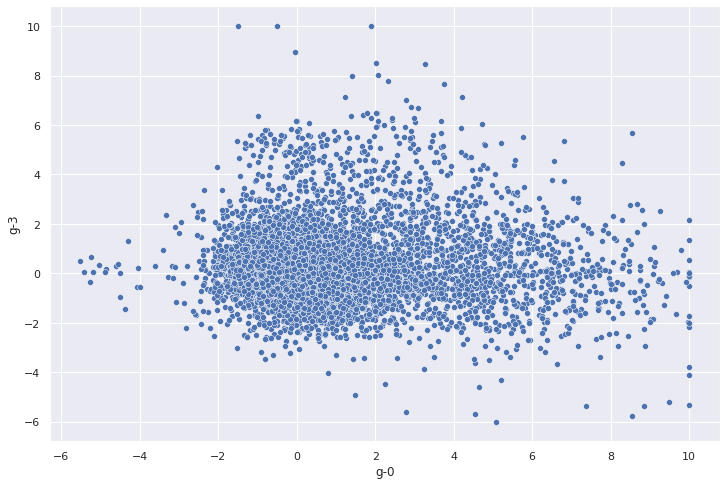

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='g-0', y='g-3', data=dados)

plt.show()

Plotando a dispersão das colunas g-0 e g-8:

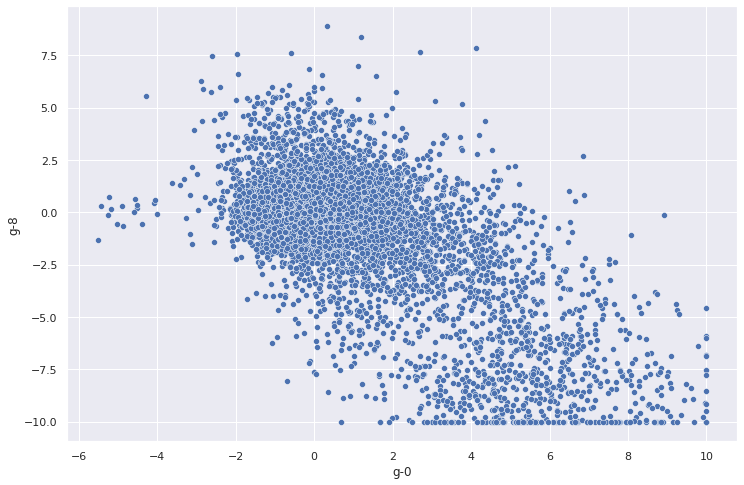

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='g-0', y='g-8', data=dados)

plt.show()

Aparentemente, existe uma correlação entre essas duas colunas. Seria interessante plotar uma linha que mostre a tendência dos valores:

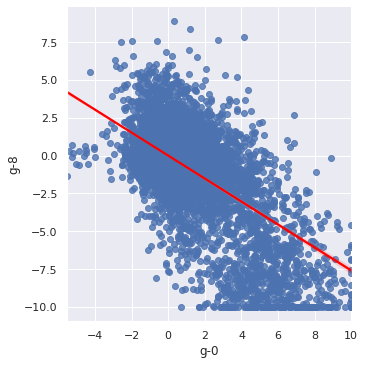

In [10]:
sns.lmplot(
    x='g-0',
    y='g-8',
    data=dados,
    line_kws={'color': 'red'},
)

plt.show()

Dividindo o plot anterior em função do tratamento e do tempo:

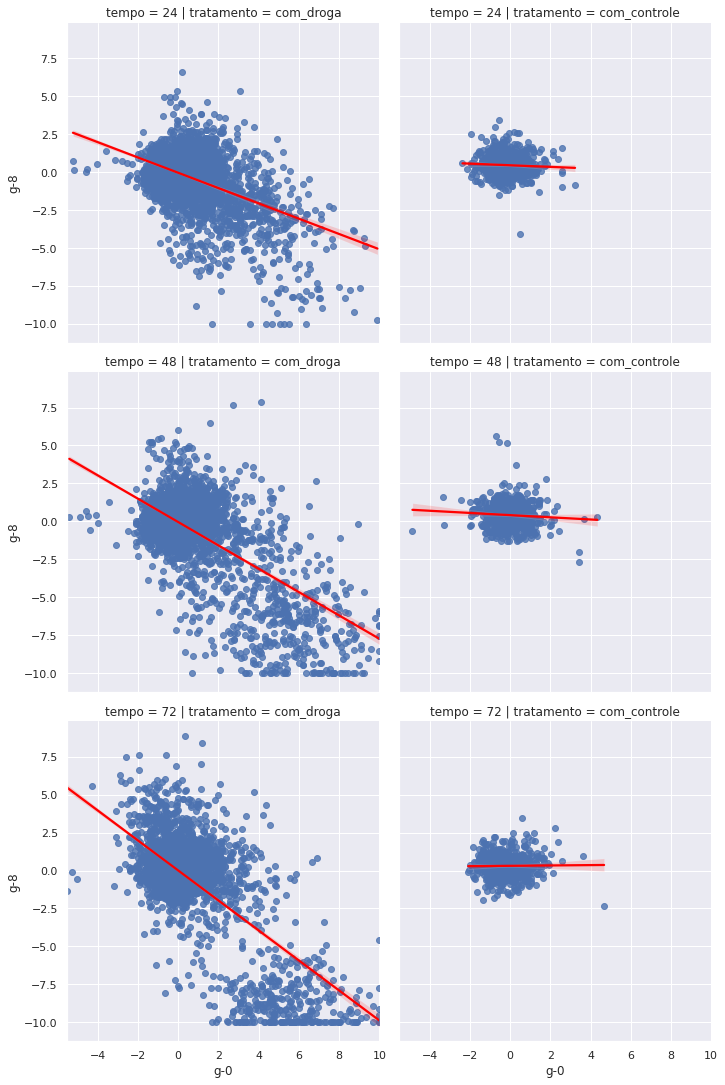

In [11]:
sns.lmplot(
    x='g-0',
    y='g-8',
    data=dados,
    line_kws={'color': 'red'},
    col='tratamento',
    row='tempo'
)

plt.show()

Calculando a correlação de todos os genes:

In [12]:
dados.loc[:, 'g-0':'g-771'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g-767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,-0.013157,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
g-768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,-0.291836,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
g-769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,0.037013,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
g-770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,0.415967,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


Plotando um mapa de calor com as correlações encontradas:

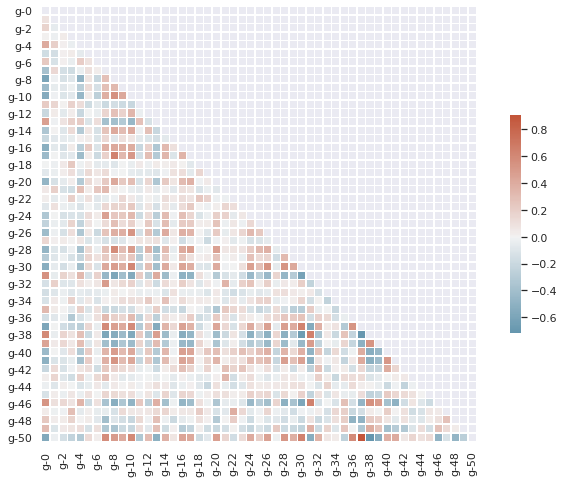

In [13]:
import numpy as np

corr = dados.loc[:, 'g-0':'g-50'].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.show()

Plotando um mapa de calor com as correlações entre os tipos celulares:

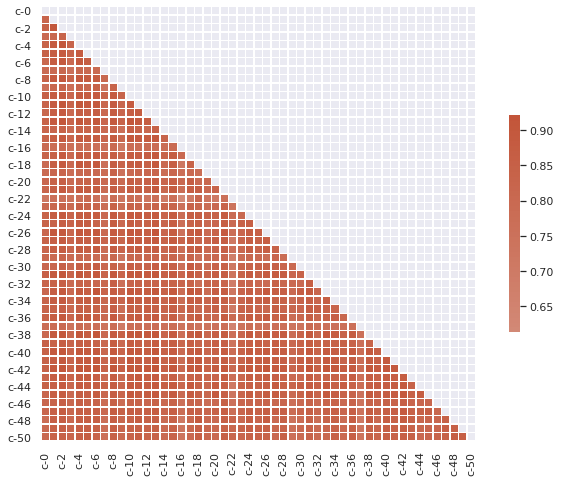

In [14]:
corr = dados.loc[:, 'c-0':'c-50'].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.show()

**Desafio**: plotar um gráfico mostrando a correlação entre as expressões génicas e os tipos celulares.

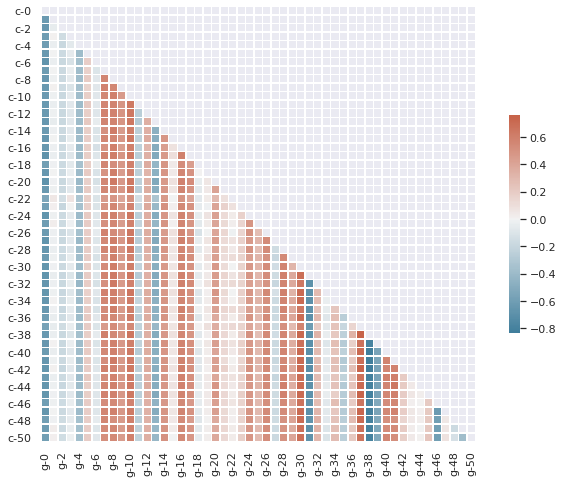

In [28]:
corr = (dados.loc[:, 'c-0':'c-50'].join(dados.loc[:, 'g-0':'g-50'])).corr().loc['c-0':'c-50', 'g-0':'g-50']

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.show()
